# Full test ETNN configs determined by optuna

## Importing section

In [1]:
import os
import sys

from etnn.tools.param_calc_config import calc_n_params_config

sys.path.insert(0, os.path.pardir)

In [2]:
import pandas as pd

from etnn.routines.run_config import run_config

import matplotlib.pyplot as plt

from etnn.tools.training_tools import ConfigStore

## Definitions section

In [3]:
def create_plot(
        config_idx: int,
        what: str = "r2"
) -> None:
    plt.figure()
    # load data
    STORAGE_FOLDER = os.path.join("../../results", str(config_idx))
    df_measures = pd.read_csv(os.path.join(STORAGE_FOLDER, "accuracies.csv"))

    # Plot the initial data
    for config_id in df_measures.config_id.unique():
        # make subdataset for config id
        sub_df = df_measures[df_measures.config_id == config_id]

        # plot train test and val
        for mode in ['train', 'test', 'val']:
            # plot training
            if f"{mode}_{what}" in sub_df.columns:
                plt.plot(sub_df.epoch, sub_df[f"{mode}_{what}"], label=f"{config_id}_{mode}-{what}")

    plt.title(f"{what} plot")
    plt.xlabel("epoch")
    plt.ylabel("score")
    if what == "r2":
        plt.ylim(-1, +1)
    elif what == "loss":
        plt.yscale('log')
    plt.legend()
    plt.show()

## Tree advanced label

Rank 1 parameter configuration: Unnamed: 0                                      44
number                                          44
value                                     0.911161
datetime_start          2023-12-21 14:03:42.982924
datetime_complete       2023-12-21 14:05:47.969871
duration                    0 days 00:02:04.986947
params_batcher                                True
params_hidden_dim                              272
params_k                                         5
params_learning_rate                      0.001299
state                                     COMPLETE
Name: 44, dtype: object
Parameters etnn: 644913
Parameters baseline: 673979


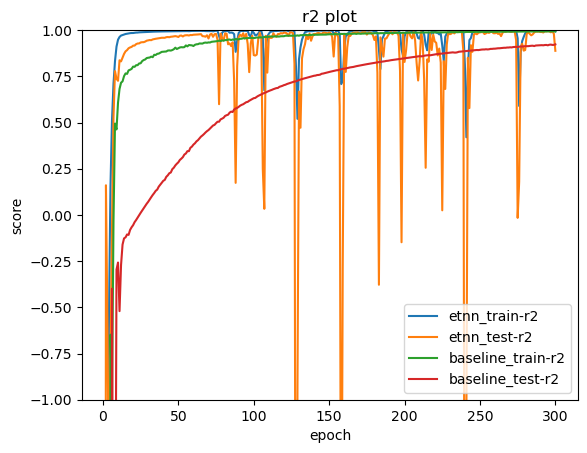

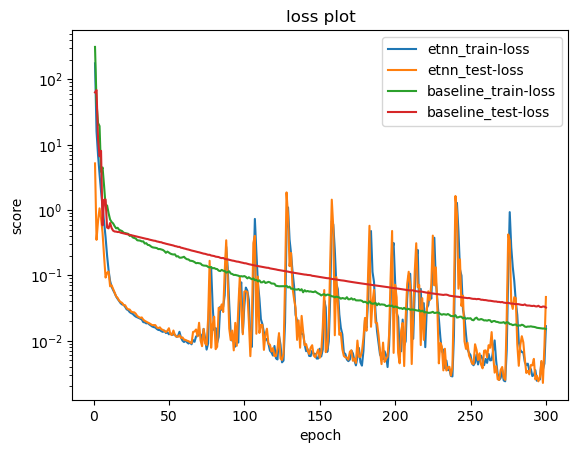

Rank 2 parameter configuration: Unnamed: 0                                      11
number                                          11
value                                     0.905306
datetime_start          2023-12-21 13:09:07.752817
datetime_complete       2023-12-21 13:10:42.392242
duration                    0 days 00:01:34.639425
params_batcher                                True
params_hidden_dim                              240
params_k                                         5
params_learning_rate                      0.001131
state                                     COMPLETE
Name: 11, dtype: object
Parameters etnn: 502801
Parameters baseline: 525305


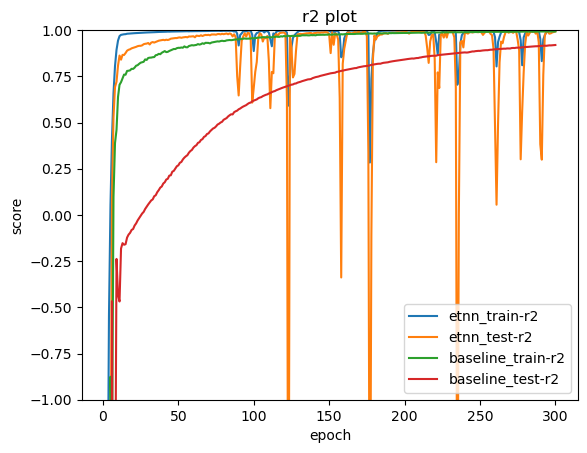

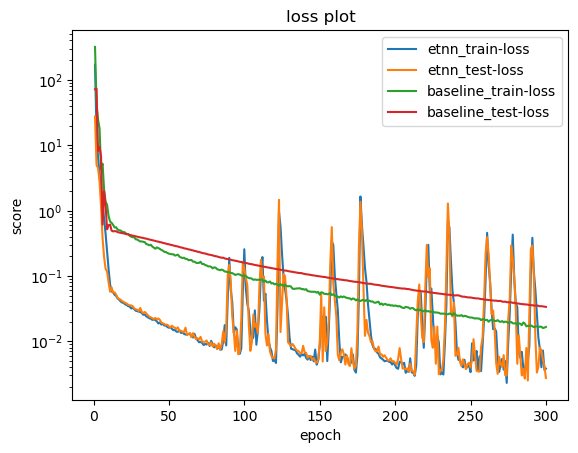

Rank 3 parameter configuration: Unnamed: 0                                      13
number                                          13
value                                     0.899195
datetime_start          2023-12-21 13:12:16.612204
datetime_complete       2023-12-21 13:13:51.079505
duration                    0 days 00:01:34.467301
params_batcher                               False
params_hidden_dim                              256
params_k                                         4
params_learning_rate                      0.001616
state                                     COMPLETE
Name: 13, dtype: object
Parameters etnn: 505857
Parameters baseline: 529190


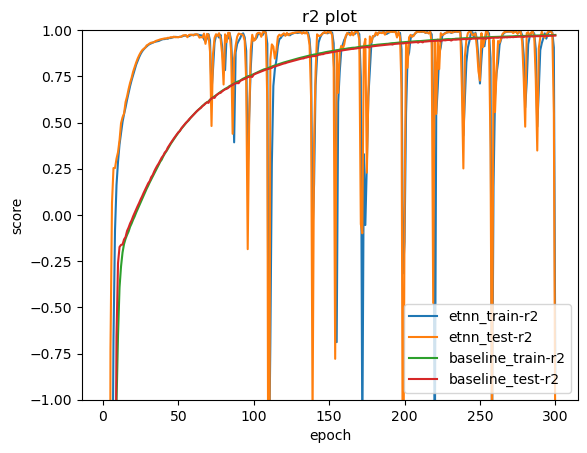

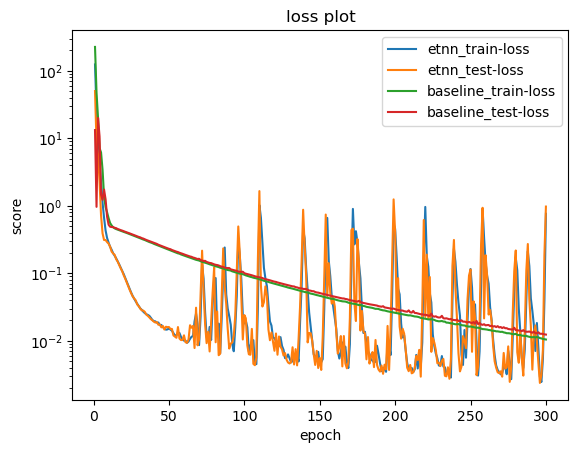

In [4]:
# define label to show
label = "tree_advanced"

# load config storage
config_table = pd.read_csv("study_label-tree-advanced_post-normalized.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=10_000,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## Tree label

Rank 1 parameter configuration: Unnamed: 0                                      46
number                                          46
value                                     0.755326
datetime_start          2023-12-21 15:29:37.769749
datetime_complete       2023-12-21 15:31:12.756342
duration                    0 days 00:01:34.986593
params_batcher                               False
params_hidden_dim                              240
params_k                                         5
params_learning_rate                      0.001734
state                                     COMPLETE
Name: 46, dtype: object
Parameters etnn: 502801
Parameters baseline: 525305


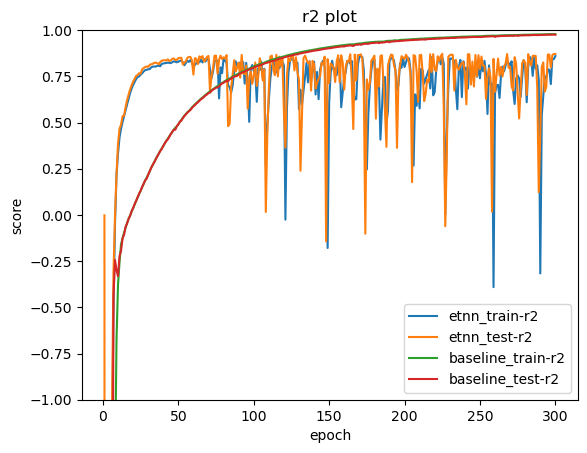

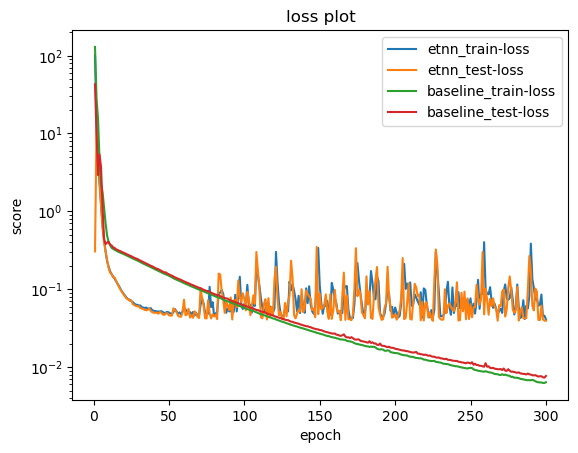

Rank 2 parameter configuration: Unnamed: 0                                      34
number                                          34
value                                      0.75263
datetime_start          2023-12-21 15:10:57.953688
datetime_complete       2023-12-21 15:12:33.039787
duration                    0 days 00:01:35.086099
params_batcher                               False
params_hidden_dim                              336
params_k                                         3
params_learning_rate                      0.002254
state                                     COMPLETE
Name: 34, dtype: object
Parameters etnn: 755665
Parameters baseline: 790665


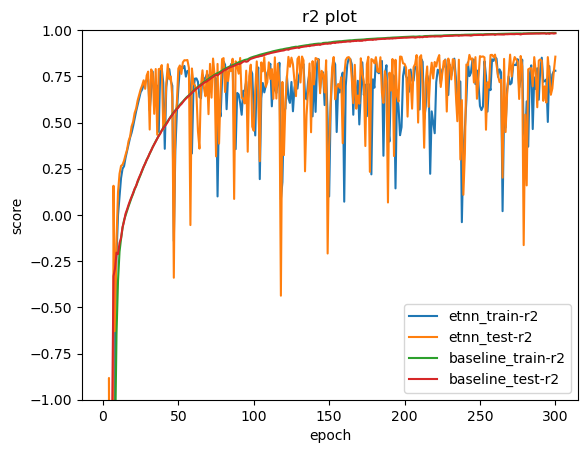

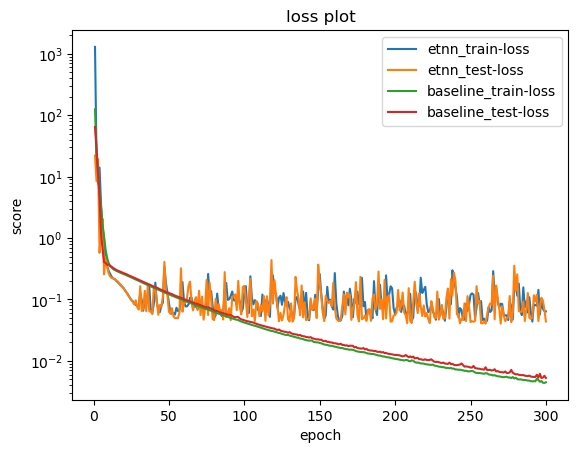

Rank 3 parameter configuration: Unnamed: 0                                      29
number                                          29
value                                     0.751584
datetime_start          2023-12-21 15:02:05.763210
datetime_complete       2023-12-21 15:03:41.511032
duration                    0 days 00:01:35.747822
params_batcher                               False
params_hidden_dim                              368
params_k                                         3
params_learning_rate                      0.001299
state                                     COMPLETE
Name: 29, dtype: object
Parameters etnn: 905649
Parameters baseline: 950704


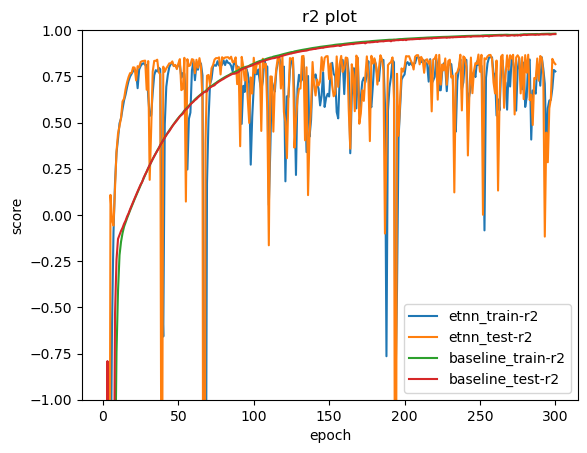

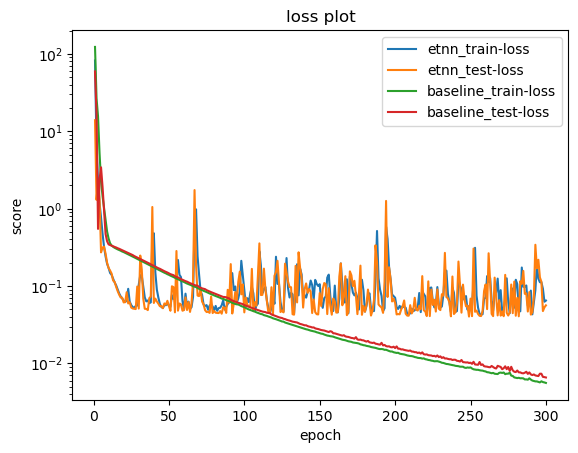

In [5]:
# define label to show
label = "tree"

# load config storage
config_table = pd.read_csv("study_label-tree_post-normalized.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=10_000,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## Default label

In [ ]:
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv("study_label-default_post-normalized.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=-2,
        ds_size=10_000,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

Rank 1 parameter configuration: Unnamed: 0                                      19
number                                          19
value                                     0.410565
datetime_start          2023-12-21 16:08:42.050306
datetime_complete       2023-12-21 16:10:19.501321
duration                    0 days 00:01:37.451015
params_batcher                               False
params_hidden_dim                              320
params_k                                         4
params_learning_rate                      0.004566
state                                     COMPLETE
Name: 19, dtype: object


  1%|          | 3/300 [00:14<22:58,  4.64s/it]